---
<a name='title'></a>
# **<font color="Navy"> F√≠sica del clima </font>**
## **<font color="RoyalBlue"> Radiaci√≥n solar </font>**
### **<font color="DodgerBlue"> Notebook 1: La insolaci√≥n y modelo 1D </font>**
### Escuela Nacional de Ciencias de la Tierra
#### **<font color="Forestgreen"> Semestre 2026-I  </font>**


---

La insolaci√≥n como medida de la radiaci√≥n solar que llega a la superficie terrestre, tiene una variabilidad que resulta de suma importancia para el clima. Aunque nosotros no lo percibimos tanto en el d√≠a, la cantidad de radiaci√≥n solar que alcanza la superficie y la duraci√≥n de su exposici√≥n son factores cruciales para determinar las estaciones y el clima de una regi√≥n.

## La insolaci√≥n y el balance radiativo en escala planetaria 1D


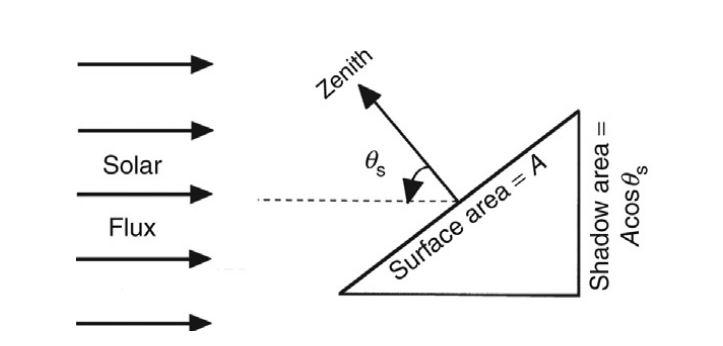

A partir de la Figura anterior podemos escribir el flujo solar por unidad de √°rea como:

\begin{equation}
Q = S_0 \bigg(\frac{\overline{d}}{d}\bigg)^2 cos \theta _s
\label{eq:qins}
\end{equation}

donde $\theta_s$ es el √°ngulo cenital, $\overline{d}$ es la distancia promedio entre un planeta y el Sol, para el caso terrestre $\overline{d}=$1.5$\times$10$^{11}$ m, y $d$ es la distancia real que hay entre los dos cuerpos en un punto determinado del a√±o, o d√≠a del a√±o ($d_n$). 

La multiplicaci√≥n por la raz√≥n entre la distancia promedio y la distancia real, $\frac{\overline{d}}{d}$, es necesaria para ajustar el flujo solar a las variaciones en la distancia entre el planeta y el Sol a lo largo del a√±o, ya que la intensidad de la radiaci√≥n solar disminuye conforme aumenta la distancia. Este par√°metro var√≠a en torno al valor de 1, reflejando peque√±as fluctuaciones en la distancia que influyen en la cantidad de radiaci√≥n solar que llega a la superficie terrestre en diferentes √©pocas del a√±o.




In [27]:
import numpy as np
import matplotlib.pyplot as plt
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)

#### Distancia Sol-Tierra

Seguramente sabes que la √≥rbita terrestre alrededor del Sol no es circular, si no que es una elipse. Una √≥rbita el√≠ptica tiene varias implicaciones, la primera de ellas que la distancia entre los cuerpos no es constante. La segunda, producto del hecho de que el Sol no es el centro de la √≥rbita sino uno de los focos, es que hay secci√≥n del a√±o donde la Tierra est√° m√°s cerca del Sol, aunque sea ligeramente. Es por esto que es muy importante calcular bien la distancia Tierra-Sol.

El d√≠a del a√±o ($d_n$) puede ser escrito en unidades de radianes a trav√©s de la ecuaci√≥n:

\begin{equation}
\theta_d = \frac{2\pi d_n}{365}
\end{equation}

Finalmente, la posici√≥n del planeta con respecto al Sol se puede escribir tambi√©n como funci√≥n del d√≠a del a√±o con una serie, que en particular es una serie de Fourier (por el uso de senos y cosenos):
\begin{equation}
 \bigg(\frac{\overline{d}}{d}\bigg)^2 = \sum_{n=0}^2 a_n cos(n\theta_d) + b_n sen(n\theta_d)
\end{equation}


Los coeficientes vienen del libro de Hartmann: 

Ahora escribimos estas dos ecuaciones en Python usando las funciones trigonom√©tricas: `np.sin`, `np.cos`, `np.pi`, que seguro adivinar√°s de qu√© tratan.

Nota muy bien que las funciones trigonom√©tricas de NumPy esperan los argumentos en radianes, no en grados. Para grados es otra funci√≥n la que hay que usar.

In [28]:
def theta_d(day):
    return 2*np.pi*day/365
def distance_to_sun(day):
    ans=[1.00011,0.034221,0.000719]
    bns=[0,0.001280,0.000077]
    suma=0
    for n,ai in enumerate(ans):
        suma+=ai*np.cos(n*theta_d(day))+bns[n]*np.sin(n*theta_d(day))
    return suma

Convertir el d√≠a del a√±o a radianes no es el gran c√°lculo, sigue siendo una l√≠nea, s√≥lo que la l√≠nea ha cambiado a estar en unidades de radianes, que es la intenci√≥n fundamental de este c√°lculo.

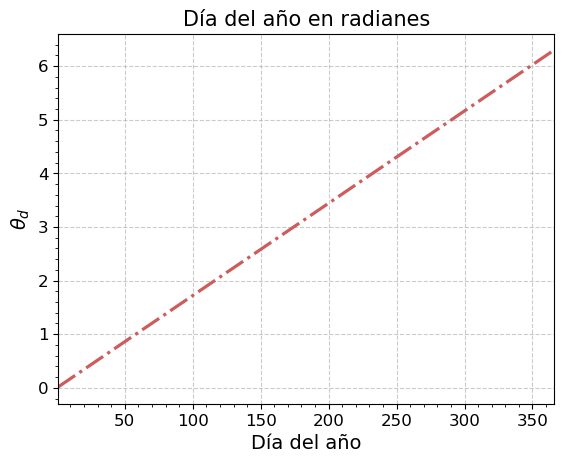

In [29]:
days=np.arange(1,366)
plt.plot(days,theta_d(days),c='indianred',linestyle='-.',linewidth=2.3)
lineplot_setup(1,366,xlab='D√≠a del a√±o',ylab=r'$\theta_d$',
               ymin=None,ymax=None,title='D√≠a del a√±o en radianes')

Vamos a escribir un ejemplo de c√≥mo se calcular√≠a la distancia Sol Tierra para el d√≠a 74 del a√±o, que cae alrededor del 12 de marzo. 

In [30]:
print(distance_to_sun(74))

1.0107942593442738


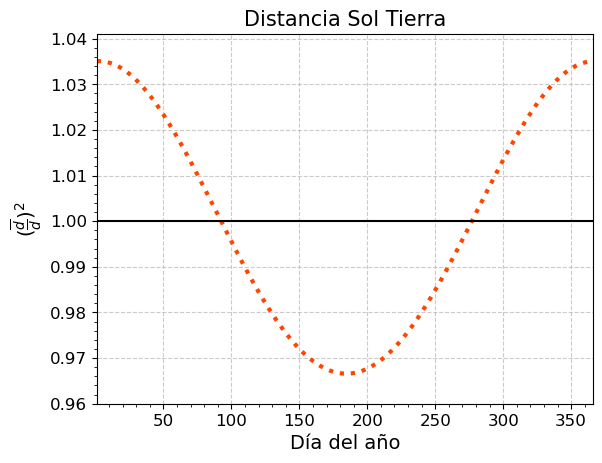

In [31]:
plt.plot(days,distance_to_sun(days),c='orangered',linestyle=':',linewidth=3)
lineplot_setup(1,366,xlab='D√≠a del a√±o',ylab=r'$(\frac{\overline{d}}{d})^2$',
               ymin=0.96,ymax=1.041,title='Distancia Sol Tierra')
plt.axhline(1,c='k')

#### √Ångulo de declinaci√≥n solar

El √°ngulo de declinaci√≥n solar ($\delta$) se puede estimar a partir de conocer el d√≠a del a√±o $d$ que calculamos arriba. Este √°ngulo $\delta$ es el √°ngulo entre el ecuador y una l√≠nea que va del centro de la Tierra al centro del Sol. Tambi√©n es la latitud del punto en la superficie directamente debajo del Sol a mediod√≠a. 
Para aproximar $\delta$ podemos utilizar la serie de Fourier:
 
\begin{equation}
\delta = \sum_{n=0}^3 a_n cos(n\theta_d) + b_n sin(n\theta_d).
\end{equation}

cuyos coeficientes podemos encontrar en la presentaci√≥n.

A continuaci√≥n escribimos la funci√≥n en Python para obtener el √°ngulo de declinaci√≥n solar.

In [32]:
def delta(day):
    ans=[0.006918,-0.399912,-0.006758,-0.002697]
    bns=[0,0.070257,0.000907,0.001480]
    suma=0
    for n,ai in enumerate(ans):
        suma+=ai*np.cos(n*theta_d(day))+bns[n]*np.sin(n*theta_d(day))
    return suma

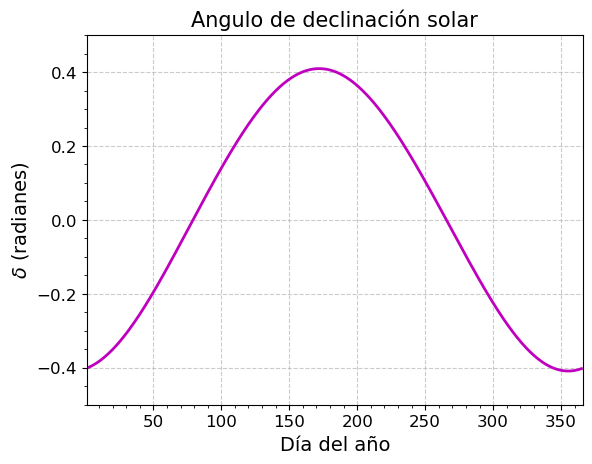

In [33]:
plt.plot(days,delta(days),c='m',linewidth=2)
lineplot_setup(1,366,xlab='D√≠a del a√±o',ylab=r'$\delta$ (radianes)',
               ymin=-0.5,ymax=0.5,title='Angulo de declinaci√≥n solar')

Podemos tambi√©n graficar ahora estos valores pero convirti√©ndolos a grados, anteriormente estaban en radianes.

Le vamos a cambiar, otra vez el color a las l√≠neas, si quieres probar con otros colores, aqu√≠ est√°n todos los colores "default" posibles: https://matplotlib.org/stable/gallery/color/named_colors.html

In [34]:
delta(135)*180/np.pi

18.911668338477188

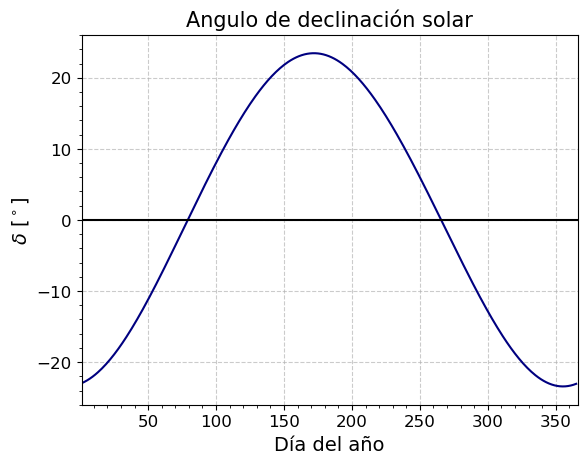

In [35]:
plt.plot(days,delta(days)*180/np.pi,c='navy')
lineplot_setup(1,366,xlab='D√≠a del a√±o',ylab=r'$\delta$ [$^\circ$]',
               ymin=-26,ymax=26,title='Angulo de declinaci√≥n solar')
plt.axhline(0,c='k')

In [36]:
delta(np.array([150,168]))*180/np.pi

array([21.80461176, 23.40001519])

#### El √°ngulo horario

El √°ngulo horario es el √°ngulo hora cuando ocurre el atardecer y el amanecer, es decir, a mediod√≠a el √°ngulo cenital depende solamente de la latitud y el √°ngulo de declinaci√≥n solar. El atardecer y amanecer occurren cuando el √°ngulo cenital es de 90$^\circ$. 
Si el coseno del √°ngulo cenital es negativo eso quiere decir que el Sol se encuentra por debajo del horizonte y la superficie est√° en oscuridad. Sabiendo esto, podemos definir un √°ngulo horario especial, que llamaremos $h_0$ y que es el √°ngulo horario equivalente a cuando el √°ngulo cenital es de 90$^\circ$. Dicho de otra manera un poco m√°s directa, es la medidad del √°ngulo horario que ocurre entre el atardecer y oscurecer y que nos mide la **longitud temporal de 1 d√≠a solar**.

La hora del atardecer y del amanecer se relaciona con el √°ngulo de declinaci√≥n solar y la latitud. 
Seguramente te has dado cuenta que los d√≠as empiezan a durar m√°s en estos d√≠as de febrero. La manera de relacionar esto es a trav√©s de la ecuaci√≥n:

\begin{equation}
cos\, h_0 = -tan\phi tan\delta 
\end{equation}

Por lo que despejando $h_0$:

\begin{equation}
 h_0 = arccos \bigg( -tan\phi tan\delta  \bigg)
\end{equation}

In [37]:
1/np.cos(0.5)

1.139493927324549

In [38]:
np.arccos(0.5)

1.0471975511965979

In [39]:
def hour_angle(phi,day):
    argument=np.tan(np.deg2rad(phi))*np.tan(delta(day))
    # np arc cos es el arco coseno de un argumento
    h0=np.arccos(-argument)
    return h0

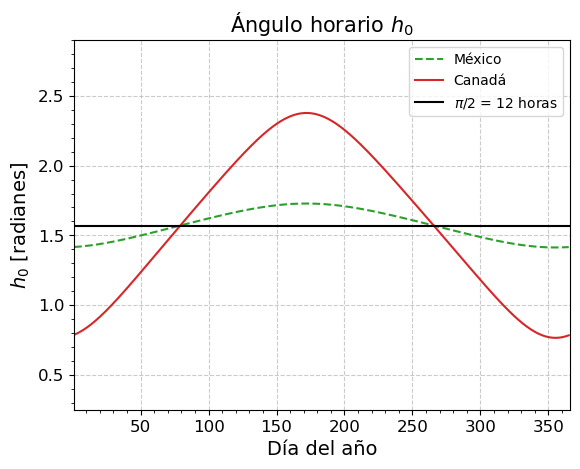

In [40]:
h_0_Mex=hour_angle(19.9,days)
h_0_Canada=hour_angle(59,days)
plt.plot(days,h_0_Mex,c='tab:green',linestyle='--',label='M√©xico')
plt.plot(days,h_0_Canada,c='tab:red',linestyle='-',label='Canad√°')
plt.axhline(np.pi/2,c='k',label='$\pi/2$ = 12 horas')
lineplot_setup(1,366,xlab='D√≠a del a√±o',ylab=r'$h_0$ [radianes]',
               ymin=0.25,ymax=2.9,title='√Ångulo horario $h_0$')
plt.legend()


Ahora bien, el √°ngulo cenital es m√°s dif√≠cil de calcular de lo que parece. Pero podemos escribir una ecuaci√≥n anal√≠tica que nos diga el √°ngulo cenital como funci√≥n de tres otros √°ngulos ($\theta_s(\phi,\delta,h)$), el √°ngulo de declinaci√≥n solar ($\delta$), el √°ngulo horario ($h$) y la latitud ($\phi$). En la presentaci√≥n tenemos un esquema relacionando estos tres √°ngulos y la derivaci√≥n de su relaci√≥n se encuentra en el ap√©ndice A de Hartmann. Podemos escribir la ecuaci√≥n del √°ngulo cenital entonces como:


\begin{equation}
cos\theta_s = sin\phi sin\delta +cos\phi cos\delta cos h
\label{eq:cenital}
\end{equation}

Uniendo todo esto, podemos obtener que: 

\begin{align}
Q = S_0 \bigg(\frac{\overline{d}}{d}\bigg)^2 \bigg[sin\phi sin\delta +cos\phi cos\delta cos h \bigg]
\end{align}

 Esta ecuaci√≥n nos dice cu√°nto es la insolaci√≥n en un instante en un punto del planeta s√≥lo como funci√≥n de su latitud, y su d√≠a del a√±o, una vez que consideramos todas las ecuaciones anteriores. Es decir, la cantidad de radiaci√≥n que llega depende fundamentalmente de estos dos factores:
 
 - ¬øD√≥nde estamos en la Tierra? ($\phi$).
 - ¬øQu√© d√≠a del a√±o es? ($d$)

In [41]:
phi=19
h=0
def theta_s(phi,dn):
    argu=np.sin(np.deg2rad(phi))*np.sin(delta(dn))+np.cos(np.deg2rad(phi))*np.cos(delta(dn))
    return np.arccos(argu)

In [42]:
delta(209)*180/np.pi

18.945483229572336

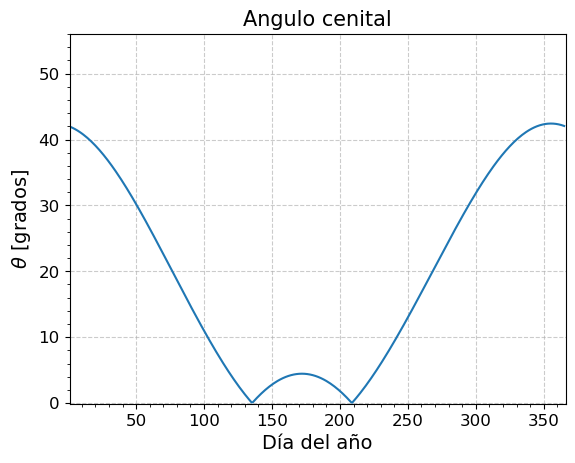

In [43]:
plt.plot(days,theta_s(19,days)*180/np.pi)
lineplot_setup(1,366,xlab='D√≠a del a√±o',ylab=r'$\theta$ [grados]',
               ymin=-.1,ymax=56,title='Angulo cenital')

In [44]:
def Q(d,zenith,S_0=1367):
    d_mean = 1.5e11
    distance = (d_mean/d)**2
    Qvar = S_0*distance*np.cos(np.deg2rad(zenith))
    return Qvar

Ahora bien, si queremos obtener una ecuaci√≥n que nos diga cu√°nto vale el valor integrado de la insolaci√≥n para un d√≠a sobre una superficie plana, es decir la cantidad de radiaci√≥n promedio que llega en un d√≠a a la Tierra tenemos que integrar la ecuaci√≥n siguiente desde el amanecer $-h_0$ hasta el atardecer $h_0$, es decir:

\begin{align}
\int Q dh = S_0 \bigg(\frac{\overline{d}}{d}\bigg)^2 \bigg( \int_{-h_0}^{h_0} sen\phi sen\delta \, dh + \int_{-h_0}^{h_0} cos\phi cos\delta cos h \, dh \bigg)
\label{eq:qins}
\end{align}

En las notas vienen los pasos para llegar a la soluci√≥n:

\begin{align}
\therefore \bar{Q}= \frac{S_0}{\pi} \bigg(\frac{\overline{d}}{d}\bigg)^2 [h_0 sen\phi sen\delta+cos\phi cos\delta sen h_0]
\label{eq:qmean}
\end{align}
 
 En resumen, la insolaci√≥n promedio diaria se modela considerando c√≥mo estos factores afectan la cantidad de radiaci√≥n solar que llega a un lugar espec√≠fico en la Tierra en un d√≠a dado. 
 Este es un modelo simple de clima, que nos dice para 1D como se distribuye una variable, en este caso la insolaci√≥n.

In [45]:
def Q_mean(phi,day,S_0=1367):
    # estimamos la distancia al sol para este dia particular
    d=distance_to_sun(day)
    # para este dia tambien obtenemos el angulo de declinacion solar
    Delta = delta(day)
    # ifs especiales para cuando no hay insolacion. 
    if (np.pi/2)-Delta<np.deg2rad(phi):
        h_0=np.deg2rad(180)
    elif -(np.pi/2)-Delta>np.deg2rad(phi):
        h_0=np.deg2rad(180)
    elif np.deg2rad(phi)>(np.pi/2)+Delta:
        h_0=0
    elif np.deg2rad(phi)<-(np.pi/2)+Delta:
        h_0=0
    else:
        h_0=hour_angle(phi,day)
    
    # calculamos la ecuacion especial
    Q_mean = (S_0/np.pi)*d*((h_0)*np.sin(np.deg2rad(phi))*np.sin(Delta)+np.cos(np.deg2rad(phi))*np.cos(Delta)*np.sin(h_0))
    return Q_mean

Podemos evaluar la funci√≥n para un ejemplo de latitud, parecida a la de Jalisco o Durango y el d√≠a del a√±o 180.

In [48]:
phi=42
day=18
Q_mean(phi,day)

165.38515616211524

Ahora repetimos el procedimiento que hicimos varias celdas arribas, para evaluar una funci√≥n dado un par de argumentos, en este caso $\bar{Q}(\phi,d)$. 

En este caso tenemos que iterar sobre los objetos de `latitudes` y `days`.

In [21]:
latitudes=np.arange(-90,90,0.5)
days=np.arange(1,366)
Q_all = np.zeros((len(latitudes),len(days)))
for ilat,lat in enumerate(latitudes):
    for idd,day in enumerate(days):
        Q_all[ilat,idd]=Q_mean(lat,day)
print(np.max(Q_all))

562.1207043718584


Ya que tenemos esta matriz llena de valores podemos graficar el resultado. Se debe ver como la gr√°fica de Hartmann de la presentaci√≥n, esto es $\bar{Q}$.

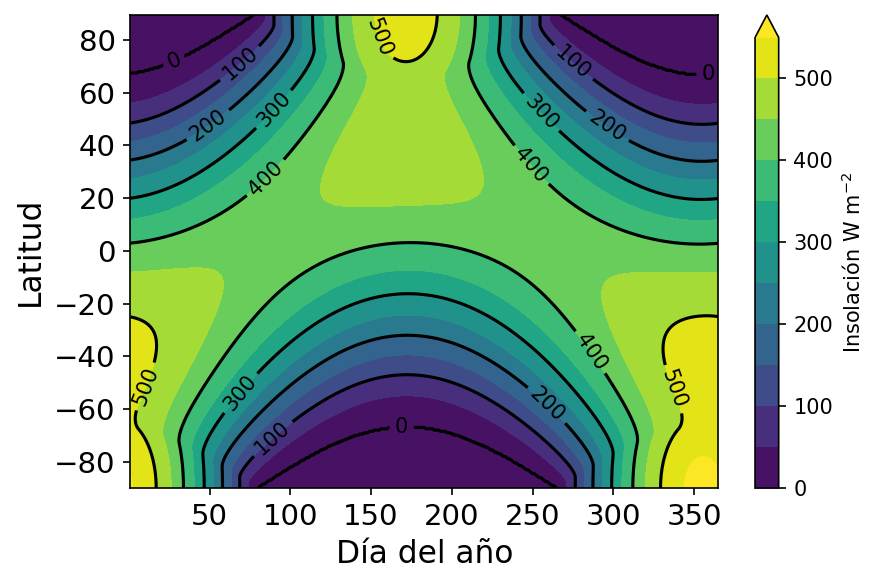

In [24]:
plt.figure(figsize=(6,4),dpi=150)
plt.contourf(days,latitudes,Q_all,levels=np.arange(0,551,50),extend='max')
plt.colorbar(label='Insolaci√≥n W m$^{-2}$')
cc=plt.contour(days,latitudes,Q_all,levels=np.arange(0,701,100),colors='k')
plt.clabel(cc)
plt.xlabel('D√≠a del a√±o',fontsize=15)
plt.ylabel('Latitud',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('Qday.png')


# üåü **An√°lisis e Interpretaci√≥n de Resultados**

---

## üìà **¬øQu√© nos dice esta gr√°fica de contorno?**

La distribuci√≥n de insolaci√≥n solar revela patrones fundamentales que gobiernan nuestro clima y ecosistemas:

> **üîç Observaciones clave:**
> - La "migraci√≥n" de la zona de m√°xima energ√≠a entre los tr√≥picos
> - Extremos polares: desde 500 W‚ãÖm‚Åª¬≤ en verano hasta 0 W‚ãÖm‚Åª¬≤ en invierno
> - El ecuador no siempre recibe la m√°xima insolaci√≥n
> - Simetr√≠a casi perfecta entre hemisferios con desfase de 6 meses

---

## ü§î **Preguntas para Reflexionar**

### **üåç Interpretaci√≥n F√≠sica:**
1. **¬øPor qu√© la m√°xima insolaci√≥n no ocurre en los solsticios para todas las latitudes?**
   
2. **¬øQu√© significa que algunas regiones muestren 0 W‚ãÖm‚Åª¬≤ durante meses?**

3. **¬øPor qu√© el patr√≥n forma una especie de "reloj de arena"?**

### **üå± Conexiones con la Naturaleza:**
4. **¬øC√≥mo explica esta gr√°fica la existencia de las estaciones?**

5. **¬øPor qu√© los desiertos se concentran alrededor de los 30¬∞ de latitud?**

6. **¬øQu√© relaci√≥n tiene esto con la migraci√≥n animal?**

### **‚ö° Aplicaciones Pr√°cticas:**
7. **¬øD√≥nde ser√≠a √≥ptimo instalar paneles solares seg√∫n estos datos?**

8. **¬øC√≥mo usar√≠an esta informaci√≥n los arquitectos para dise√±o bioclim√°tico?**

9. **¬øPor qu√© las civilizaciones agr√≠colas se desarrollaron en ciertas latitudes?**

---

## üíª **Ejercicios Computacionales**

### **üìä Nivel B√°sico:**
- [ ] Extrae y grafica la insolaci√≥n anual para tu ciudad
- [ ] Compara el ciclo anual entre Ecuador, M√©xico y Groenlandia  
- [ ] Encuentra el d√≠a de m√°xima y m√≠nima insolaci√≥n para latitud 45¬∞N

### **üî¨ Nivel Intermedio:**
- [ ] Calcula la insolaci√≥n promedio anual por latitud
- [ ] Implementa efectos atmosf√©ricos (absorci√≥n, reflexi√≥n)
- [ ] Crea una funci√≥n que determine las "estaciones solares"

### **üöÄ Nivel Avanzado:**
- [ ] Modela c√≥mo cambiar√≠a todo si la Tierra tuviera diferente inclinaci√≥n axial
- [ ] Investiga el efecto de la excentricidad orbital en las glaciaciones
- [ ] Simula la insolaci√≥n en otros planetas (Marte, Venus)

---

## üåà **Extensiones Creativas**

### **¬øQu√© pasar√≠a si...?**
- La Tierra fuera plana (sin curvatura)
- No tuviera inclinaci√≥n axial (oblicuidad = 0¬∞)
- Orbitara m√°s cerca o m√°s lejos del Sol
- Tuviera una √≥rbita perfectamente circular

### **üé® Visualizaciones Adicionales:**
- Animaci√≥n temporal mostrando la "danza" anual de la insolaci√≥n
- Mapa mundial con estas isol√≠neas proyectadas
- Gr√°fica 3D interactiva latitud-tiempo-insolaci√≥n
- Comparaci√≥n con datos satelitales reales

---

## üéØ **Reflexi√≥n Final**

> *"Esta simple ecuaci√≥n matem√°tica captura uno de los motores m√°s fundamentales de nuestro planeta: la distribuci√≥n desigual de energ√≠a solar que impulsa vientos, corrientes oce√°nicas, ciclos del agua y, en √∫ltima instancia, la vida misma."*

**¬øQu√© otros fen√≥menos naturales podr√≠as explicar ahora con estos resultados?**

---

### üìù **Para la pr√≥xima sesi√≥n:**
¬øTe animas a modificar el c√≥digo para incluir efectos atmosf√©ricos o explorar escenarios paleoclim√°ticos? ¬°Las posibilidades son infinitas! üöÄ